In [1]:
# Defining the dataset

from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_features = 2, n_redundant = 0, n_clusters_per_class = 2, weights =[0.99], flip_y = 0)
X,y

(array([[-1.70864918, -1.21170035],
        [-1.98997267, -1.37509107],
        [-0.58979124,  0.12372546],
        ...,
        [-2.72607517, -2.04582644],
        [-0.60093975, -0.01863664],
        [-0.48698454,  1.52893211]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [2]:
from collections import Counter

Counter(y)

Counter({0: 990, 1: 10})

990
10


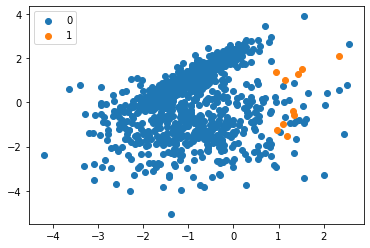

In [3]:
import matplotlib.pyplot as plt
import numpy as np

counter = Counter(y)

for labelnew, _ in counter.items():
    print(_)
    row_ix = np.where(y == labelnew)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(labelnew))
    
plt.plot()
plt.legend()
plt.show()

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Generate dataset

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 2, weights = [0.99], flip_y = 0)

# split into train/tests with same class ratio

X_train,X_test,y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.5) 

# define model

model = LogisticRegression(solver = 'liblinear')

#fit model

model.fit(X_train, y_train)

#Predict using model

yhat = model.predict(X_test)

#Evaluvate predictions

print('Accuracy: %.3f' % accuracy_score(y_test, yhat))
print('Precision Score: %.3f' %precision_score(y_test, yhat))
print('Recall Score: %.3f' %recall_score(y_test,yhat))
print('F-Score:%.3f' %f1_score(y_test,yhat))
confusion_matrix(y_test,yhat)

Accuracy: 0.993
Precision Score: 0.842
Recall Score: 0.320
F-Score:0.464


array([[4947,    3],
       [  34,   16]])

In [5]:
Counter(yhat)

Counter({0: 4981, 1: 19})

In [6]:
Counter(y_test)

Counter({1: 50, 0: 4950})

In [7]:
from sklearn.metrics import fbeta_score
fbeta_score(yhat, y_test, beta = 0.5)

0.36529680365296807

##### UnderSampling the majority class

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


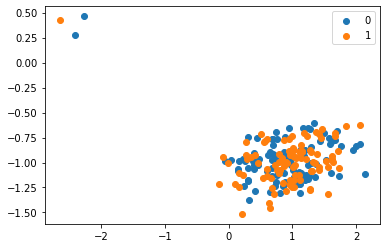

In [8]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import matplotlib.pyplot as plt
# Generate dataset

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y=0)

print(Counter(y))

undersample = RandomUnderSampler(sampling_strategy = 1)

X_under, y_under = undersample.fit_resample(X, y)

print(Counter(y_under))

counter = Counter(y_under)

for labelnew, _ in counter.items():
    row_idx = np.where(y_under == labelnew)[0]
    plt.scatter(X[row_idx,0], X[row_idx, 1], label = str(labelnew))

plt.legend()
plt.show()
    

In [9]:
import numpy as np
print(y_under.shape)
print(y.shape)
print(X.shape)
np.where(y_under == 0)

(200,)
(10000,)
(10000, 2)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [10]:
undersample.sampling_strategy_

OrderedDict([(0, 100)])

In [11]:
undersample.sample_indices_

array([9826, 1318, 5976, 5646, 8401, 2953, 6413, 1779, 9392, 9142, 3454,
       7989, 9696, 1802, 6006, 9488,  568, 8893, 4926, 7217, 7403, 8656,
       9150, 5478, 9738,   93, 5274, 3701, 4687, 2341,  431, 3124, 7324,
       9320, 1369, 1097, 3338, 5695,  703, 4254, 8916, 2708, 1282, 5183,
       7642, 7611, 5645, 8872, 8805, 4155, 8322, 5224, 7437, 4852, 1248,
       1199, 3009, 4969, 4060, 6497, 1907,  267, 9237,  581, 6883, 1232,
       5331, 6678, 3551, 8777,  429, 2601, 5936, 4719, 9340, 1804, 4072,
       8138, 6298, 4677, 8422, 3128, 8423, 7005, 2716, 6175, 6392, 5461,
        309, 1079, 8774, 1281, 2816, 3091, 5722, 6924,  991, 5845, 1325,
       7808,    0,   69,  119,  319,  323,  352,  388,  490,  524,  551,
        684,  782,  998, 1114, 1132, 1324, 1475, 1497, 1515, 1773, 1785,
       1805, 1818, 1922, 2080, 2081, 2085, 2278, 2290, 2504, 2610, 2798,
       2845, 2940, 2979, 2994, 3017, 3063, 3144, 3205, 3261, 3275, 3420,
       3435, 3567, 3873, 4066, 4166, 4233, 4443, 44

Counter({0: 9900, 1: 100})


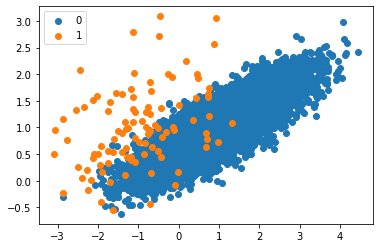

In [12]:

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

<function matplotlib.pyplot.show(close=None, block=None)>

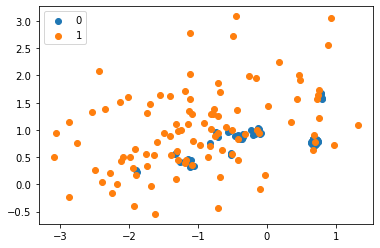

In [13]:
from imblearn.under_sampling import NearMiss
import numpy as np
import matplotlib.pyplot as plt

undersample = NearMiss(version = 1, n_neighbors = 3, sampling_strategy = 1)

X, y = undersample.fit_resample(X,y)


counter  = Counter(y)


for labelnew,_ in counter.items():
    row_indx = np.where(y == labelnew)[0]
    plt.scatter(X[row_indx, 0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

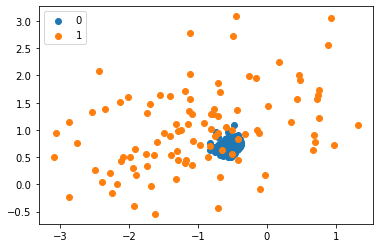

In [14]:
undersample_new = NearMiss(version = 2, n_neighbors = 3, sampling_strategy = 1)

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

X, y = undersample_new.fit_resample(X,y)

counter  = Counter(y)


for labelnew,_ in counter.items():
    row_indx = np.where(y == labelnew)[0]
    plt.scatter(X[row_indx, 0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show

Counter({0: 100, 1: 100})


<function matplotlib.pyplot.show(close=None, block=None)>

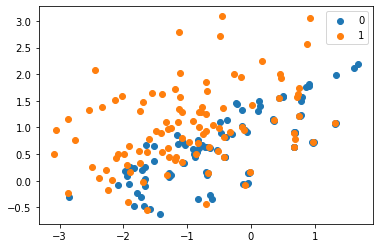

In [15]:
undersample_new = NearMiss(version = 3, n_neighbors = 3)

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

X, y = undersample_new.fit_resample(X,y)

counter  = Counter(y)
print(counter)

for labelnew,_ in counter.items():
    row_indx = np.where(y == labelnew)[0]
    plt.scatter(X[row_indx, 0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show

In [16]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
print(Counter(y))

undersample = CondensedNearestNeighbour(n_neighbors = 3)

X, y = undersample.fit_resample(X,y)
counter = Counter(y)
counter

Counter({0: 9900, 1: 100})


Counter({0: 121, 1: 100})

<function matplotlib.pyplot.show(close=None, block=None)>

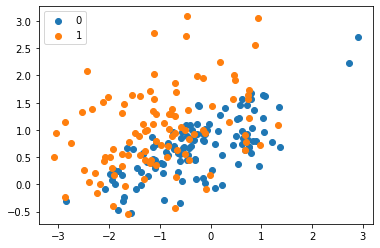

In [17]:
for labelnew,_ in counter.items():
    row_indx = np.where(y == labelnew)[0]
    plt.scatter(X[row_indx, 0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show

Counter({0: 9900, 1: 100})
Counter({0: 9879, 1: 100})


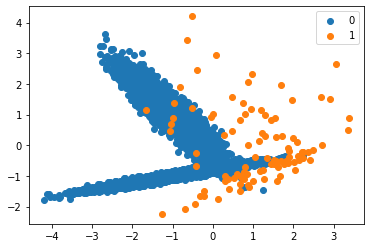

In [28]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 2, random_state = 1)

counter = Counter(y)
print(counter)

undersample = TomekLinks()

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    row_indx = np.where(y == labelnew)[0]
    plt.scatter(X[row_indx, 0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 100})


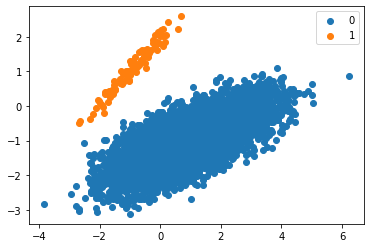

In [30]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], n_clusters_per_class= 1, flip_y = 0)

counter = Counter(y)
print(counter)

undersample = EditedNearestNeighbours(n_neighbors=3)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    row_indx = np.where(y==labelnew)[0]
    plt.scatter(X[row_indx,0], X[row_indx, 1], label = str(labelnew))

plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 421, 1: 100})


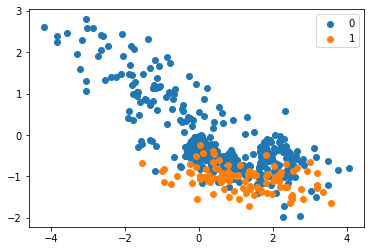

In [41]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], n_clusters_per_class= 1, flip_y = 0)

counter = Counter(y)
print(counter)

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S = 100)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    row_indx = np.where(y==labelnew)[0]
    plt.scatter(X[row_indx,0], X[row_indx, 1], label = str(labelnew))

plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 9887, 1: 100})


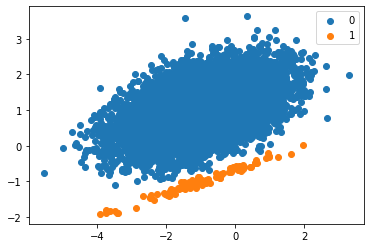

In [37]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NeighbourhoodCleaningRule
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], n_clusters_per_class= 1, flip_y = 0)

counter = Counter(y)
print(counter)

undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning = 0.5)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    row_indx = np.where(y==labelnew)[0]
    plt.scatter(X[row_indx,0], X[row_indx, 1], label = str(labelnew))

plt.legend()
plt.show()

### SMOTE - Oversampling Minority Class

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


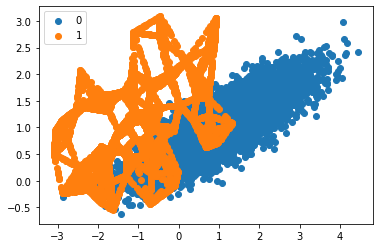

In [3]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 1, random_state = 1)
counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    row_indx = np.where(labelnew == y)[0]
    plt.scatter(X[row_indx,0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show()

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


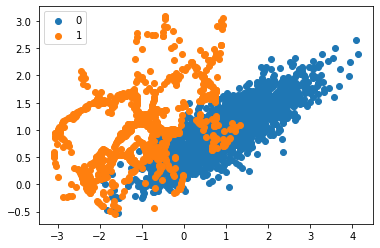

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 1, random_state = 1)
counter = Counter(y)
print(counter)

over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [('o', over),('u', under)]
pipeline = Pipeline(steps = steps)

X, y = pipeline.fit_resample(X,y)

counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    row_indx = np.where(labelnew == y)[0]
    plt.scatter(X[row_indx,0], X[row_indx, 1], label = str(labelnew))
plt.legend()
plt.show()


In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 1, random_state = 1)
counter = Counter(y)
print(counter)

steps = [('over', SMOTE()),('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(pipeline, X, y, cv= cv, n_jobs = -1, scoring = 'roc_auc')
print('MEAN ROC AUC: %.3f' %np.mean(scores))

Counter({0: 9900, 1: 100})
MEAN ROC AUC: 0.826


In [12]:
# Only the decision tree without SMOTE

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 1, random_state = 1)
counter = Counter(y)
print(counter)

model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, X, y, cv= cv, n_jobs = -1, scoring = 'roc_auc')
print('MEAN ROC AUC: %.3f' %np.mean(scores))

Counter({0: 9900, 1: 100})
MEAN ROC AUC: 0.769


In [16]:
# With SMOTE and RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 1, random_state = 1)
counter = Counter(y)
print(counter)

steps = [('over', SMOTE(sampling_strategy = 0.1)),('under', RandomUnderSampler(sampling_strategy = 0.5)),('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(pipeline, X, y, cv= cv, n_jobs = -1, scoring = 'roc_auc')
print('MEAN ROC AUC: %.3f' %np.mean(scores))


Counter({0: 9900, 1: 100})
MEAN ROC AUC: 0.845


In [17]:
# With SMOTE and RandomUnderSampler and different values of nearest neighbors for SMOTE

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples = 10000, n_features = 2, n_redundant = 0, weights = [0.99], flip_y = 0, n_clusters_per_class = 1, random_state = 1)
counter = Counter(y)
print(counter)

k_values = [1,2,3,4,5,6,7]

for k in k_values:

    steps = [('over', SMOTE(sampling_strategy = 0.1, k_neighbors = k)),('under', RandomUnderSampler(sampling_strategy = 0.5)),('model', DecisionTreeClassifier())]
    pipeline = Pipeline(steps=steps)

    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(pipeline, X, y, cv= cv, n_jobs = -1, scoring = 'roc_auc')
    print('MEAN ROC AUC: %.3f' %np.mean(scores))


Counter({0: 9900, 1: 100})
MEAN ROC AUC: 0.823
MEAN ROC AUC: 0.824
MEAN ROC AUC: 0.828
MEAN ROC AUC: 0.846
MEAN ROC AUC: 0.843
MEAN ROC AUC: 0.846
MEAN ROC AUC: 0.852


#### BorderLine SMOTE

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


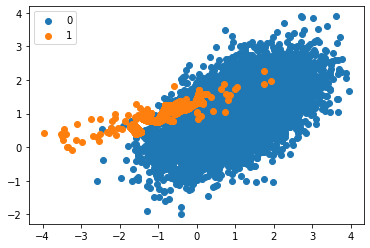

In [21]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_clusters_per_class= 1, n_redundant = 0, weights = [0.99], flip_y = 0)
counter = Counter(y)
print(counter)

over = BorderlineSMOTE()
X, y = over.fit_resample(X, y)
counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    rowindex = np.where(labelnew == y)[0]
    plt.scatter(X[rowindex, 0], X[rowindex, 1] , label = str(labelnew))
plt.legend()
plt.show()


#### SVM SMOTE

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


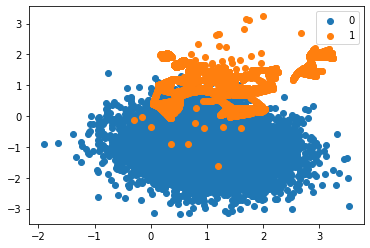

In [22]:
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features = 2, n_clusters_per_class= 1, n_redundant = 0, weights = [0.99], flip_y = 0)
counter = Counter(y)
print(counter)

over = SVMSMOTE()
X, y = over.fit_resample(X, y)
counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    rowindex = np.where(labelnew == y)[0]
    plt.scatter(X[rowindex, 0], X[rowindex, 1] , label = str(labelnew))
plt.legend()
plt.show()

#### Oversampling and Undersampling

Counter({0: 9900, 1: 100})
Counter({0: 9495, 1: 4529})


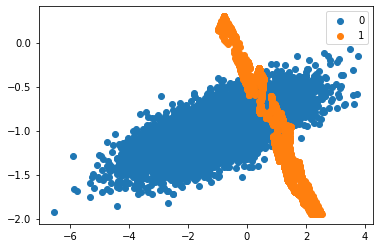

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples = 10000, n_features =2, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0)
counter = Counter(y)
print(counter)

smoteenn = SMOTEENN(sampling_strategy = 0.5)
X,y = smoteenn.fit_resample(X,y)
counter = Counter(y)
print(counter)

for labelnew, _ in counter.items():
    rowindex = np.where(labelnew == y)[0]
    plt.scatter(X[rowindex, 0], X[rowindex, 1], label = str(labelnew))
    
plt.legend()
plt.show()
